<a href="https://colab.research.google.com/github/MINIVO2/Transfer_learning_tf/blob/main/04_transfer_learning_tensorflow_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning with tensorflow part 1 : Feature Extraction

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)




TensorFlow version: 2.18.0
TensorFlow Hub version: 0.16.1


In [ ]:
!pip install tf_keras
import tf_keras

##Downloading and becoming one with data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2025-02-27 06:52:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 172.253.118.207, 74.125.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  23.3MB/s    in 8.1s    

2025-02-27 06:52:55 (19.9 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_10_percent'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_10_percent
There are 10 directories and 0 images in 10_food_classes_10_percent/test
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_10_percent/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_10_percent/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_10_percent/test/hamburger
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_10_percent/test/ramen
There are 0 directories and 250 images in 10_food_classes_10_percent/test/pizza
There are 0 directories and 250 images in 10_food_classes_10_percent/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_10_percent/test/steak
There are 0 directories and 250 images in 10_food_classes_10_percent/test/sushi
There are 10 directori

##Creating data loaders(preparing the data)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)


In [ ]:

print("Training Images")
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = IMAGE_SHAPE,
                                               batch_size = BATCH_SIZE
                                               )
print("Testing Images")
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size = IMAGE_SHAPE,
                                               batch_size = BATCH_SIZE
                                               )

Training Images
Found 750 images belonging to 10 classes.
Testing Images
Found 2500 images belonging to 10 classes.


##Setting up callbacks (things to run whilst our model trains)

Callbacks are extra functionality you can add to your models to be performed during or after training.



### create_tensorboard_callback(dir_name, experiment_name):

In [ ]:
#create Tensorboard Callback (functoionize because we need to create new for each model)
import tensorflow as tf
import datetime

def create_tensorboard_callback(dir_name, experiment_name):

  log_dir = dir_name + '/' + experiment_name  + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf_keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f"Saving tensorboard log files to: {log_dir}")
  return tensorboard_callback


# Creating models using tensoflow hub

https://www.tensorflow.org/hub

https://www.kaggle.com/models?tfhub-redirect=true

Browsing the tensorflow hub page and sortiong classification we found feature vector model link https://www.kaggle.com/models/tensorflow/efficientnet/tensorFlow2/b0-feature-vector/1?tfhub-redirect=true

In [ ]:
#lets compare the following 2 model

resnet_url = "https://www.kaggle.com/models/tensorflow/resnet-50/TensorFlow2/classification/1"

efficientnet_url = "https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1"


In [ ]:
#Import dependencies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models

###Lets make a create model function to create a model from url

def create_model(model_url, num_classes = 10):

In [ ]:
# !pip install --upgrade tensorflow_hub
# import tensorflow as tf
# import tensorflow_hub as hub

# def create_model(model_url, num_classes=10):
#     '''
#     Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

#     Args:
#     model_url (str): A TensorFlow Hub feature extraction URL
#     num_classes (int): Number of output neurons in the output layer,
#                        should be equal to the number of target classes, default is 10.

#     Returns:
#     An uncompiled Keras Sequential model with model_url as feature extractor
#     layer and dense output layer with num_classes output neurons.
#     '''

#     # Download the pretrained model and save it as a Keras layer
#     feature_extraction_layer = hub.KerasLayer(model_url,
#                                               trainable=False,  # Freeze the already learned patterns
#                                               name="feature_extraction_layer",
#                                               input_shape=(224, 224, 3))

#     # Create our own model
#     model = tf.keras.Sequential([
#         feature_extraction_layer,
#         tf.keras.layers.Dense(num_classes, activation="softmax")
#     ])

#     return model

In [ ]:
!pip install tf_keras
import tf_keras
def create_model(model_url, num_classes):
  '''
    Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

    Args:
    model_url (str): A TensorFlow Hub feature extraction URL
    num_classes (int): Number of output neurons in the output layer,
                       should be equal to the number of target classes, default is 10.

    Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor
    layer and dense output layer with num_classes output neurons.
    '''
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           input_shape=(224,224,3),
                                           name='feature_extraction_layer')

  model = tf_keras.Sequential()
  model.add(feature_extractor_layer)
  model.add(tf_keras.layers.Dense(num_classes,
                                  activation=tf.keras.activations.softmax,
                                  name='output_layer'))

  return model

#create Resnet Tensorflow hub feature and extraction

In [ ]:
resnet_model = create_model(resnet_url,
                            num_classes = 10)

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1001)              25612201  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                10020     
                                                                 
Total params: 25622221 (97.74 MB)
Trainable params: 10020 (39.14 KB)
Non-trainable params: 25612201 (97.70 MB)
_________________________________________________________________


##Compile our ResNet model

In [ ]:
resnet_model.compile(loss = tf_keras.losses.CategoricalCrossentropy(),
                     optimizer = tf_keras.optimizers.Adam(),
                     metrics= ["accuracy"])

##fitting Our ResNet Model

In [ ]:
resnet_history = resnet_model.fit(train_data,
                                  epochs = 5,
                                  steps_per_epoch= len(train_data),
                                  validation_data = test_data,
                                  validation_steps = len(test_data),
                                  callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="Resnet_Model_50")])

Saving tensorboard log files to: tensorflow_hub/Resnet_Model_50/20250227-065342
Epoch 1/5
24/24 [==============================] - 51s 1s/step - loss: 2.2995 - accuracy: 0.1800 - val_loss: 2.2896 - val_accuracy: 0.2952
Epoch 2/5
24/24 [==============================] - 15s 630ms/step - loss: 2.2827 - accuracy: 0.2960 - val_loss: 2.2726 - val_accuracy: 0.3588
Epoch 3/5
24/24 [==============================] - 13s 555ms/step - loss: 2.2664 - accuracy: 0.3600 - val_loss: 2.2562 - val_accuracy: 0.3984
Epoch 4/5
24/24 [==============================] - 23s 988ms/step - loss: 2.2504 - accuracy: 0.4347 - val_loss: 2.2394 - val_accuracy: 0.5044
Epoch 5/5
24/24 [==============================] - 13s 555ms/step - loss: 2.2343 - accuracy: 0.5227 - val_loss: 2.2234 - val_accuracy: 0.5424


##Plot accuracy and loss curves

<Axes: >

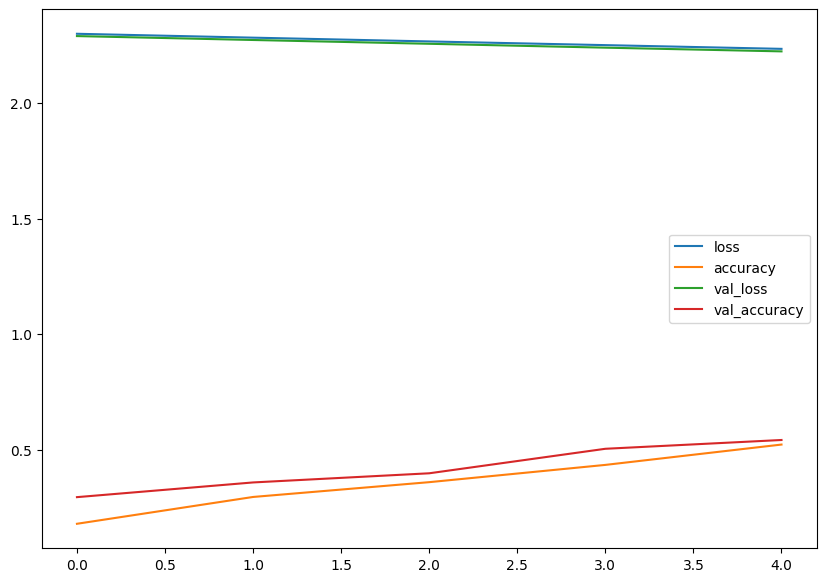

In [ ]:
import pandas as pd

pd.DataFrame(resnet_history.history).plot(figsize = (10,7))

In [ ]:
import matplotlib.pyplot as plt


def plot_loss_accuracy_curve(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  plt.figure()
  plt.plot(epochs, loss, label = "training loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = "accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

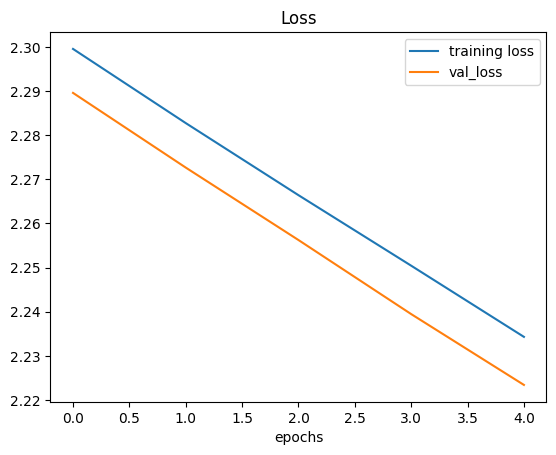

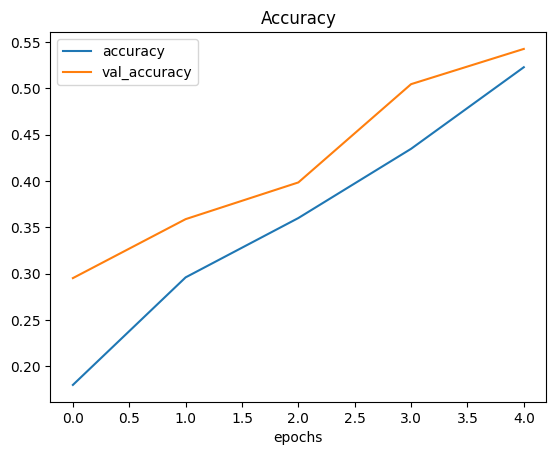

In [ ]:
plot_loss_accuracy_curve(resnet_history)

#Creating EfficientnetB0 tensoflow hub and feature extraction model

In [ ]:
efficient_model = create_model(efficientnet_url, num_classes = 10)

In [ ]:
efficient_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              4049564   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062374 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


In [ ]:
efficient_model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                     optimizer = tf_keras.optimizers.Adam(),
                     metrics= ["accuracy"])

In [ ]:
efficient_history = efficient_model.fit(train_data,
                                  epochs = 5,
                                  steps_per_epoch= len(train_data),
                                  validation_data = test_data,
                                  validation_steps = len(test_data),
                                  callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="EfficientnetB0")])

Saving tensorboard log files to: tensorflow_hub/EfficientnetB0/20250227-065823
Epoch 1/5
24/24 [==============================] - 29s 635ms/step - loss: 1.7936 - accuracy: 0.4800 - val_loss: 1.2503 - val_accuracy: 0.7508
Epoch 2/5
24/24 [==============================] - 12s 506ms/step - loss: 1.0321 - accuracy: 0.7773 - val_loss: 0.8456 - val_accuracy: 0.8232
Epoch 3/5
24/24 [==============================] - 12s 520ms/step - loss: 0.7678 - accuracy: 0.8293 - val_loss: 0.6798 - val_accuracy: 0.8432
Epoch 4/5
24/24 [==============================] - 11s 481ms/step - loss: 0.5988 - accuracy: 0.8693 - val_loss: 0.5993 - val_accuracy: 0.8596
Epoch 5/5
24/24 [==============================] - 12s 507ms/step - loss: 0.5105 - accuracy: 0.8893 - val_loss: 0.5521 - val_accuracy: 0.8548


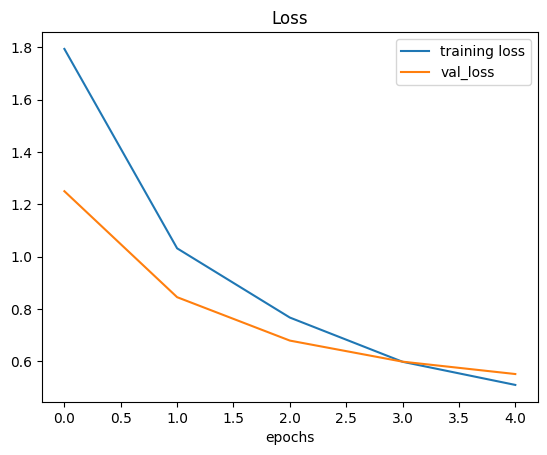

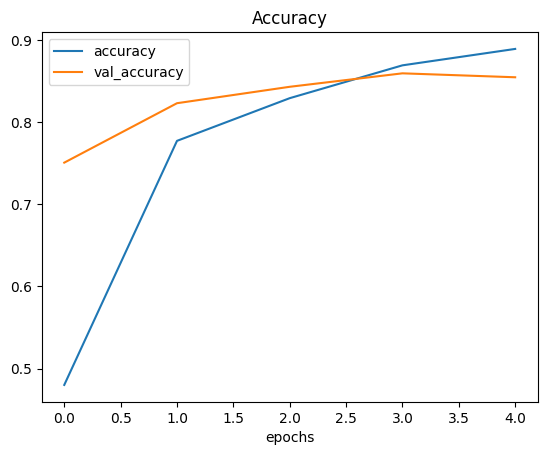

In [ ]:
plot_loss_accuracy_curve(efficient_history)

#Comparing our models results using tensorboard

##upload TensorBoard dev records

In [ ]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs ResNet50" \
  --description "comparing two different Tf hub fearture extravtion using 10 % of the training data" \
  --one_shot #after upload is done one_shot will exit the data

2025-02-27 07:00:00.797908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740639600.842421    2630 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740639600.854319    2630 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
ERROR: The `tensorboard dev` command is no longer available.

TensorBoard.dev has been shut down. For further information,
see the FAQ at <https://tensorboard.dev/>.
